<a href="https://colab.research.google.com/github/iamBehzad/Complex-Networks/blob/main/Watts_Strogatz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Author : Behzad Abbasi - 1401-02-25 - IAU Shabestar 


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools as itertools
from matplotlib.colors import LinearSegmentedColormap

# Complete Graph

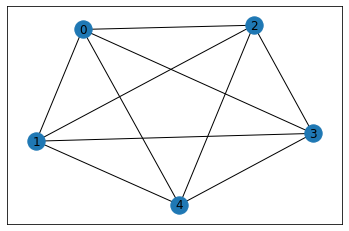

In [ ]:
n=5
nodes = range(n)
G=nx.Graph()
G.add_nodes_from(nodes)
edges = itertools.combinations(nodes, 2)
G.add_edges_from(edges)
nx.draw_networkx(G) 

# Watts-Strogatz Source

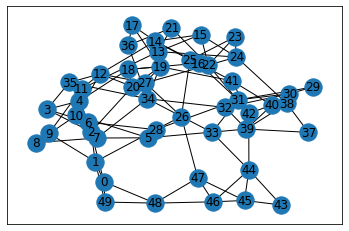

In [ ]:
n=50
k=5
p=0.3
seed = np.random.RandomState(42)

if k > n:
  raise nx.NetworkXError("k>n, choose smaller k or larger n")

  # If k == n, the graph is complete not Watts-Strogatz
if k == n:
  G=nx.complete_graph(n)

G = nx.Graph()
nodes = list(range(n))  # nodes are labeled 0 to n-1
# connect each node to k/2 neighbors
for j in range(1, k // 2 + 1):
  targets = nodes[j:] + nodes[0:j]  # first j nodes are now last in list
  G.add_edges_from(zip(nodes, targets))
  # rewire edges from each node
  # loop over all nodes in order (label) and neighbors in order (distance)
  # no self loops or multiple edges allowed
for j in range(1, k // 2 + 1):  # outer loop is neighbors
  targets = nodes[j:] + nodes[0:j]  # first j nodes are now last in list
  # inner loop in node order
  for u, v in zip(nodes, targets):
    if seed.random() < p:
      w = seed.choice(nodes)
        # Enforce no self-loops or multiple edges
      while w == u or G.has_edge(u, w):
        w = seed.choice(nodes)
        if G.degree(u) >= n - 1:
          break  # skip this rewiring
      else:
        G.remove_edge(u, v)
        G.add_edge(u, w)
nx.draw_networkx(G) 

# Watts-Strogatz Function in NetworkX

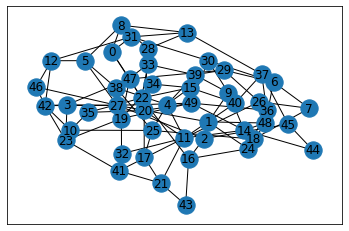

In [ ]:
G=nx.watts_strogatz_graph(50, 5, 1, seed=None)
nx.draw_networkx(G) 

# Calculate network properties for various value of Beta

Global Clustering Coef. For Graph With (Beta = 0 ) is =  0.7173913043478262
Average Shortest Path For Graph With (Beta = 0 ) is =  10.899799599198397
Number Of Hubs For Graph With (Beta = 0 ) is =  0

Global Clustering Coef. For Graph With (Beta = 0.15 ) is =  0.4510373246954709
Average Shortest Path For Graph With (Beta = 0.15 ) is =  2.603310621242485
Number Of Hubs For Graph With (Beta = 0.15 ) is =  0

Global Clustering Coef. For Graph With (Beta = 0.5 ) is =  0.11900688588724839
Average Shortest Path For Graph With (Beta = 0.5 ) is =  2.317939879759519
Number Of Hubs For Graph With (Beta = 0.5 ) is =  5

Global Clustering Coef. For Graph With (Beta = 1 ) is =  0.04599162444993071
Average Shortest Path For Graph With (Beta = 1 ) is =  2.2497955911823646
Number Of Hubs For Graph With (Beta = 1 ) is =  19



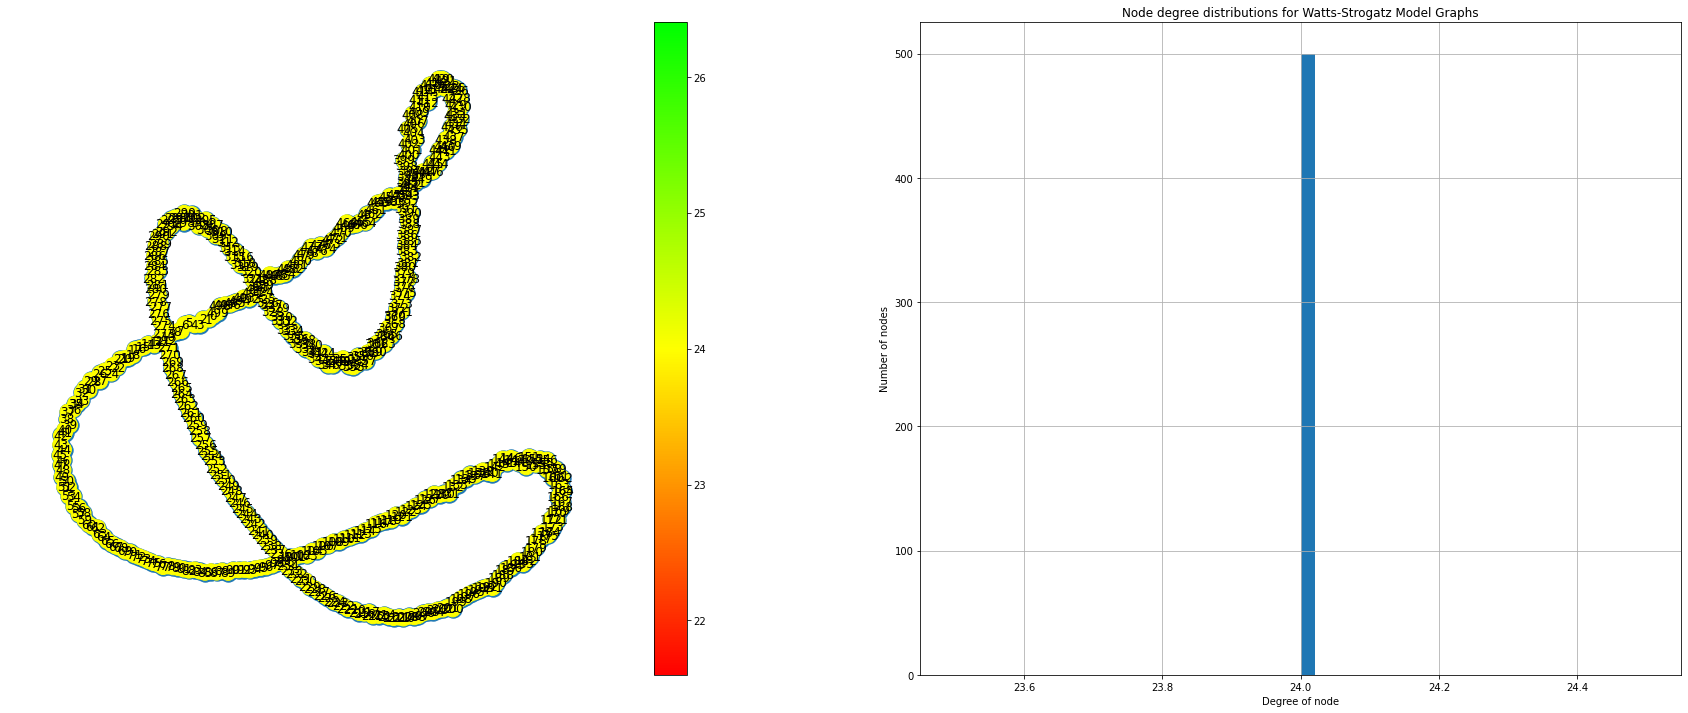

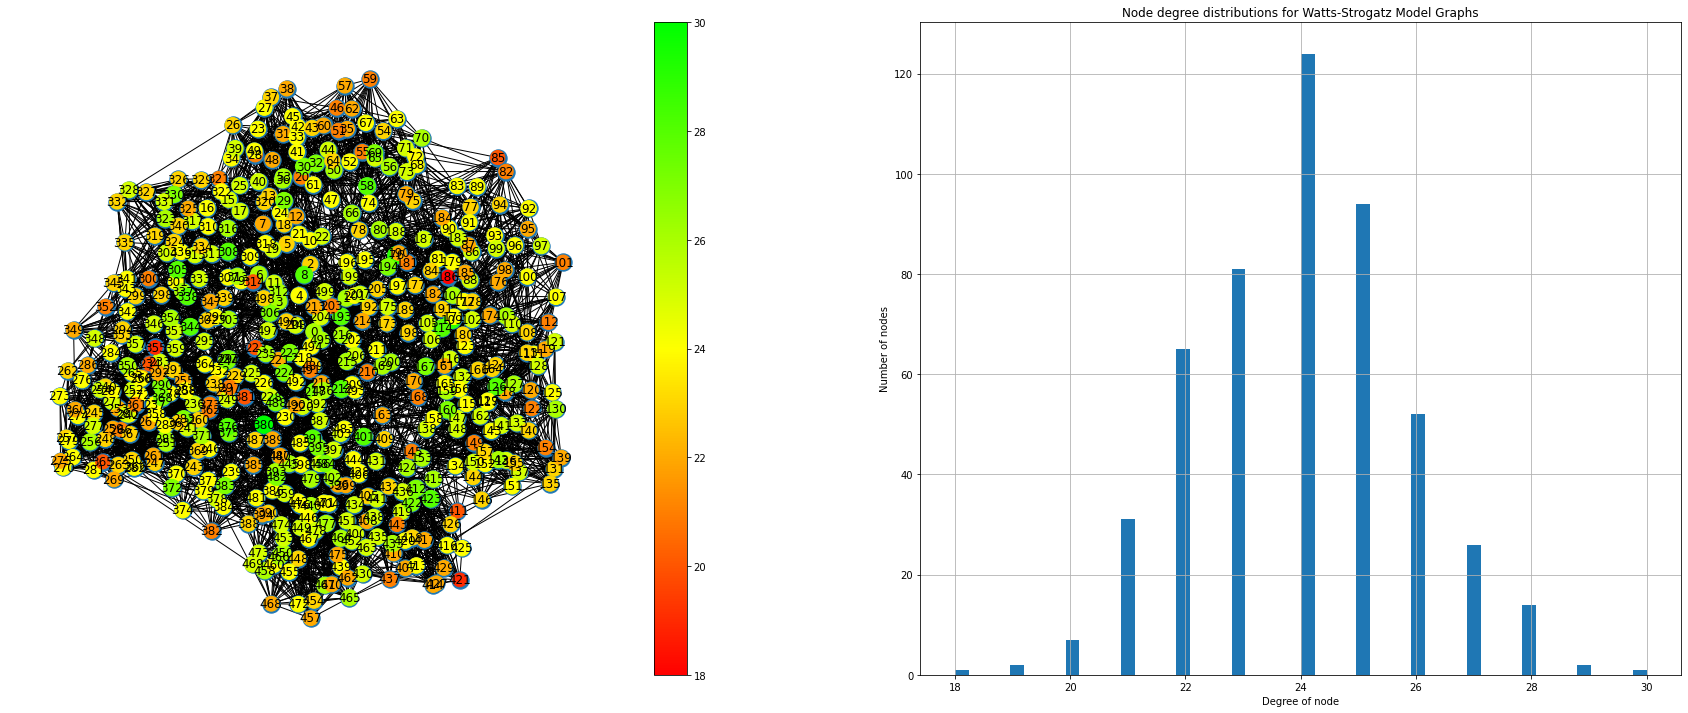

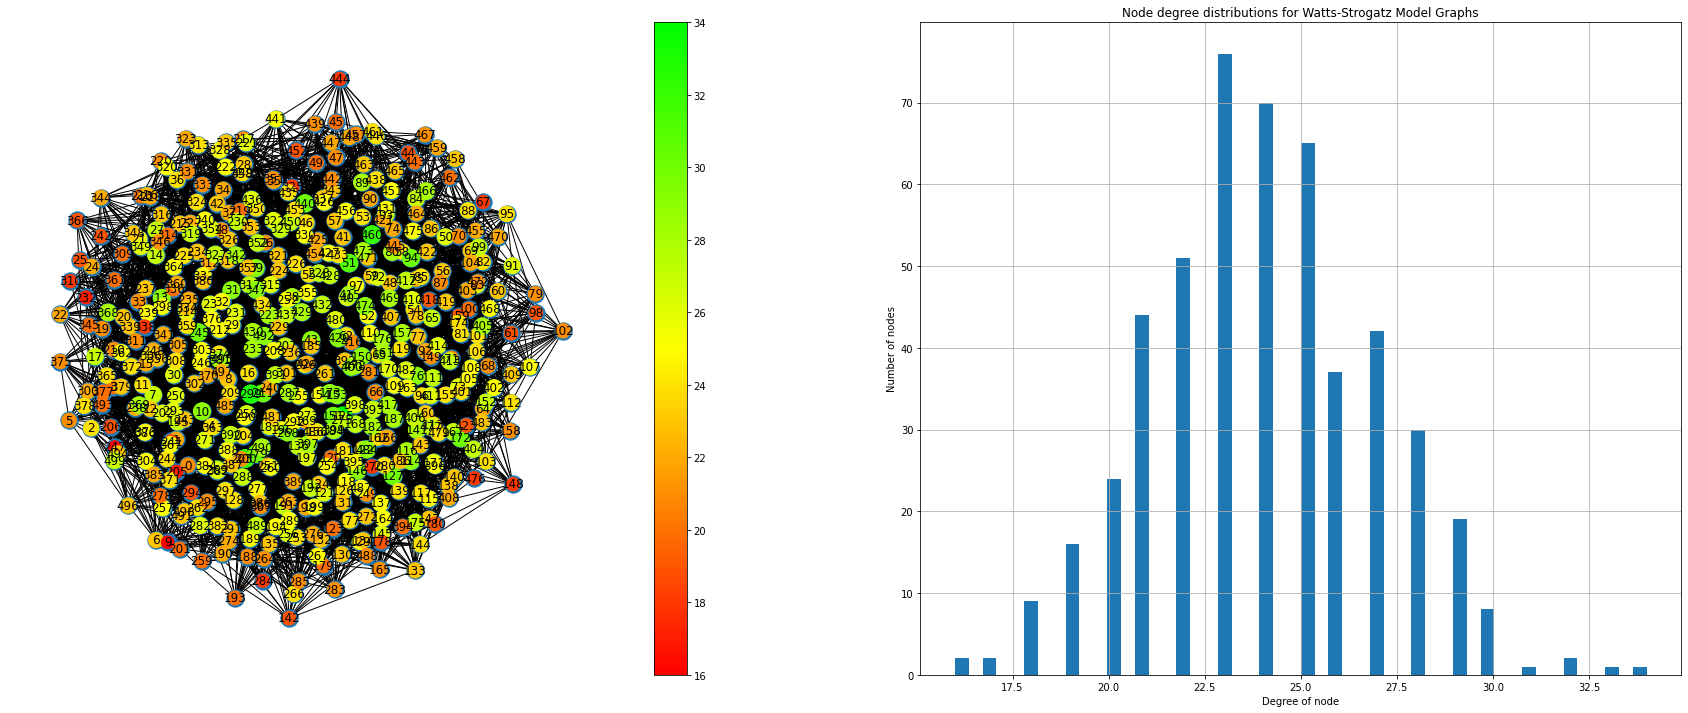

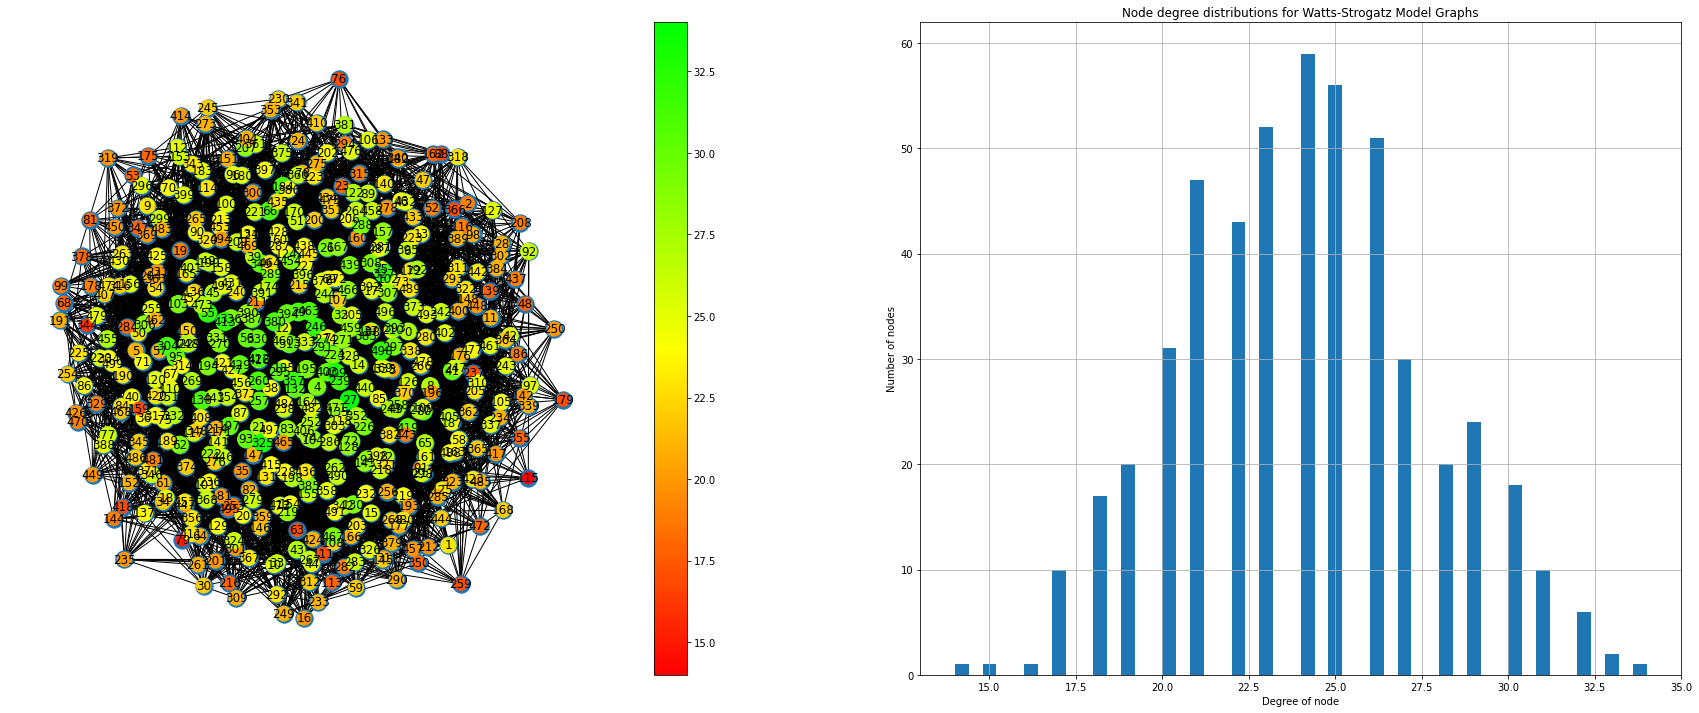

In [ ]:
n=500
k=25
beta = [0, 0.15, 0.5 , 1]

# create colormap
cdict = {'red':   ((0.0, 1.0, 1.0),
                   (0.5, 1.0, 1.0),
                   (1.0, 0.0, 0.0)),

         'green':  ((0.0, 0.0, 0.0),
                   (0.5, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'blue': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
green_yellow_red = LinearSegmentedColormap('GYR', cdict)

for i in range(0 ,len(beta)) :
  G=nx.watts_strogatz_graph(n, k, beta[i], seed=None)

  # Degree
  node_sizes = [val*10 for (node, val) in G.degree()] 
  node_degree = [val for (node, val) in G.degree()] 

  plt.figure(i, figsize=(30, 12))
  plt.subplot(121)
  pos = nx.spring_layout(G)
  nx.draw(G, pos , with_labels = True)
  P=nx.draw_networkx_nodes(G, pos, node_size = node_sizes, node_color=node_degree,cmap=green_yellow_red)
  plt.colorbar(P)

  plt.subplot(122)
  plt.hist([val for (node, val) in G.degree()] , bins = 50, alpha = 1);
  plt.title('Node degree distributions for Watts-Strogatz Model Graphs');
  plt.xlabel('Degree of node')
  plt.ylabel('Number of nodes')
  plt.grid()
  
  data = list(nx.clustering(G). items())
  print('Global Clustering Coef. For Graph With (Beta =', beta[i] , ') is = ' , np.mean(np.array(data)[:,1]))
  print('Average Shortest Path For Graph With (Beta =', beta[i] , ') is = ' ,   nx.average_shortest_path_length(G))

  print('Number Of Hubs For Graph With (Beta =', beta[i] , ') is = ' , sum( x>30 for x in node_degree))
  print()

